In [1]:
!pip install keras

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
#import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import os

# from keras.datasets import imdb
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import Conv2D,MaxPooling2D,Flatten,Conv1D
# from keras.preprocessing import sequence

from sklearn.model_selection import train_test_split


import json
import numpy as np
import pandas as pd
from sklearn import preprocessing
#import keras
#from keras.layers import Input,Dense,Lambda
#from keras.models import Model
import os
import numpy as np
#from keras.preprocessing import image as image_p
#from keras.applications.imagenet_utils import preprocess_input
#from keras.applications.vgg16 import VGG16
#import time
from sklearn.model_selection import train_test_split
#from keras.preprocessing.image import ImageDataGenerator
import pickle
import matplotlib.image as mpimg
#from keras.preprocessing import image
from  matplotlib import pyplot
#from keras.layers.normalization import BatchNormalization
import cv2
#import seaborn as sns
import random
from PIL import Image
from sklearn.utils import class_weight
#from keras.layers import Reshape
#import keras.backend as K
import numpy

In [3]:
!pip install imgaug

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
import xmltodict, json
anno = os.listdir('annotations')
import imgaug as ia
from imgaug import augmenters as iaa

In [5]:
!readlink -f images/kusk fish/334. fish2701.jpg

/storage/thesis/fish-classification/images/kusk
/storage/thesis/fish-classification/fish2701.jpg


In [8]:
count_correct = 0
count_wrong = 0
labels =  []
images = []
bb = []
bboxes = []
image_sizes = []
for file in anno:
    #try:
    if(file.split(".")[-1]=='xml'):
        try:
            with open("annotations/"+file,'r') as f:
                text = f.read()
                d = xmltodict.parse(text)
                path = d['annotation']['path'].split("/home/parmeet/thesis/fish-classification/")[1]
                print(path)
                bgr_img = cv2.imread(path)
                img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img,(224,224))
                obj = d['annotation']['object'][0] if isinstance(d['annotation']['object'],list) else d['annotation']['object']
                bbox = obj['bndbox']
                rescaled_xmin = 1.*float(bbox['xmin'])/float(d['annotation']['size']['width'])
                rescaled_xmax = 1.*float(bbox['xmax'])/float(d['annotation']['size']['width'])

                rescaled_ymin = 1.*float(bbox['ymin'])/float(d['annotation']['size']['height'])
                rescaled_ymax = 1.*float(bbox['ymax'])/float(d['annotation']['size']['height'])
                bb.append(np.array([rescaled_xmin*224,rescaled_ymin*224,rescaled_xmax*224,rescaled_ymax*224]))
                
                bbs = ia.BoundingBoxesOnImage([
                    ia.BoundingBox(x1=rescaled_xmin*224, y1=rescaled_ymin*224, x2=rescaled_xmax*224, y2=rescaled_ymax*224)
                ], shape=img.shape)
                bboxes.append(bbs)
                labels.append(obj['name'])
                images.append(img)
                image_sizes.append((float(d['annotation']['size']['width']),float(d['annotation']['size']['height'])))
                count_correct += 1
        except Exception as ex:
            print(ex)
            count_wrong += 1

images/caught lobster/lobster_cropped/Winter_Harbor_Lobster-500x500.jpg
images/caught lobster/lobster_cropped/lobsterrwe.jpg
images/cod caught/743. andrewconger.jpg
images/out of water halibut/416. img_5029.jpg
images/caught lobster/lobster_cropped/222. canadian-lobster-1-cropped-820x547.jpg
images/fresh caught jonah crab/IMG_3667r.JPG
images/fresh caught jonah crab/16464782_1247630328656863_6202853762441150464_n.jpg
images/cod caught/483. 4492038.jpg
images/out of water halibut/553. halibut-fly-fishing-4.jpg
images/fresh caught jonah crab/270. crab_jonahcrabclaws_zps90af60fe_large.jpg
OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

images/out of water halibut/616. 20151001__alj-gonetubin-10021.jpg
images/cod caught/278. 230616%20happy%20angler%20cod%20300%20.jpg
images/cod caught/288. 4lb%2520bass.jpg
images/caught lobster/lobster_cropped/567. sxl75ta11.jpg
images/out of water halibut/367. slide7.jpg
imag

images/fresh caught jonah crab/264. the_childrens_museum_of_indianapolis_-_atlantic_blue_crab.jpg
images/cod caught/41. image-136.jpeg
images/fresh caught jonah crab/269. crab-sex-identification.jpg
OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

images/fresh caught jonah crab/197. mud+crab+farming.jpg
images/kusk fish/cusk-eels-7b694e72-baf8-4719-899e-fc8a8f268a9-resize-750.jpeg
images/out of water halibut/138. homer-alaska-halibut-fishing-guide-400.jpg
images/out of water halibut/501. chinook-fishing-in-bc.jpg
images/out of water halibut/360. day-3-toping-off-the.jpg
images/caught lobster/150. 001.jpg
OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

images/cod caught/342. 006.jpg
images/out of water halibut/147. tania-halibut-2-660x440.jpg
OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion fail

images/fresh caught jonah crab/350. marine-inv_crustaceans_crabs_other-crabs_blue-crab.jpg
images/out of water halibut/31. img-0559_1 (2).jpg
images/out of water halibut/12. 50-lb-halibut.jpg
images/out of water halibut/15. 20160515_100430-1024x576 (2).jpg
images/cod caught/424. stock-photo-fresh-caught-cod-skin-and-fin-close-up-shot-23241940.jpg
images/kusk fish/IMG_2945Compressed.jpg
images/cod caught/141. cod-09-01-06.jpg
images/out of water halibut/654. dscn0216 (3).jpg
images/cod caught/698. adam-townsend-98cm-murray-cod.jpg
images/out of water halibut/14. maxresdefault.jpg
OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

images/cod caught/361. 6560dfee260d672698e3e57982f1a6f7--shimano-big-fish.jpg
images/fresh caught jonah crab/511. nobody-else-stacks-up-crabs-360x200.jpg
OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

im

images/caught lobster/lobster_cropped/525. lobster2-adlm_2.jpg
images/out of water halibut/564. george%20halibut (2).jpg
images/kusk fish/384. (brosme%20brosme)%2090f.jpg
images/cod caught/631. chinaman-fish.jpg
images/kusk fish/15. cusk-craig-borgeson-lg.jpg
images/cod caught/341. chris%20mullarky%2015lb%20cod.jpg
images/out of water halibut/419. 450big_halibut_akand101l.jpg
images/cod caught/362. 1446396914.png
images/fresh caught jonah crab/1-jonah-crab-with-eggs-andrew-j-martinez.jpg
images/out of water halibut/63. image (2).jpg
images/cod caught/333. gus-storer-shows-off-a-murray-cod-he-caught-trolling.jpg
images/out of water halibut/385. 20180723_155329%20-%20copy_zpszasnjvgr (1).jpg
images/out of water halibut/134. 17shane171may12deck.jpg
images/out of water halibut/376. halibut-bc (3).jpg
images/fresh caught jonah crab/62. 439d97413f6913b2fa8048aee33a87bd.jpg
images/kusk fish/277. fishing-01.jpg
images/fresh caught jonah crab/carcinus_maenas_1.jpg
images/out of water halibut/54

images/kusk fish/Cusk-eel-620x422.jpg
images/fresh caught jonah crab/27621058026_2baaa50c80_b.jpg
images/fresh caught jonah crab/325. stonecrabclawmeasurements.jpg
images/cod caught/654. 2303526998_08fdaa0d62_z.jpg
images/kusk fish/P1010260-1024x829.jpg
images/out of water halibut/82. halibut-fishing (2).jpg
images/out of water halibut/146. p1010446.jpg
images/caught lobster/lobster_cropped/367. jumbo-lobster-2904083_large_1.jpg
images/caught lobster/lobster_cropped/508. jumbo-lobster-2904084_large.jpg
images/out of water halibut/674. screen_shot_2014-09-15_at_1.07.23_pm.jpg
images/fresh caught jonah crab/20170104111057-25-1.jpg
images/cod caught/376. halibut_lofoten_norway_cod_hosted_trips_paul_stevens__0004.jpg
images/fresh caught jonah crab/carcinus_maenas_2.jpg
images/caught lobster/lobster_cropped/116. 670152_733418-20150630_lobsters01_2.jpg
images/caught lobster/149. 12891820_s-300x200.jpg
OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) 

images/fresh caught jonah crab/p1260840ablog9.jpg
images/kusk fish/292. opsmi_u0.jpg
images/cod caught/722. image-102.jpeg
images/out of water halibut/189. 240_img_20130509_071302.jpg
images/cod caught/319. whitby-270.jpg
images/kusk fish/368. hoplobrotarmatafishdbtaiwan.jpg
images/cod caught/661. cinfeast1.jpg
images/out of water halibut/477. 3halibut.jpg
images/cod caught/197. tfy8trro2fk01.jpg
images/out of water halibut/460. fish-counts-temp (2).jpg
images/caught lobster/lobster_cropped/217. wumm-fykcypp8404252.jpg
images/caught lobster/lobster_cropped/494. 171999.jpg
images/out of water halibut/318. alaska_salmon_jumping_out_of_water.jpg
images/kusk fish/92. dscn0933_thumb.jpg
images/kusk fish/bbb.jpg
images/out of water halibut/359. salt-2011-023-e1326587957838-1024x994.jpg
images/caught lobster/lobster_cropped/lobster-square.jpg
images/caught lobster/lobster_cropped/165. shutterstock_115735315-1050x714.jpg
images/fresh caught jonah crab/443. 73_blue-crab.jpg
images/cod caught/79

images/fresh caught jonah crab/327. blue_crab.jpg
images/cod caught/619. 4632128594_484x323.jpg
images/fresh caught jonah crab/23. crabbing-2.jpg
OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

images/out of water halibut/703. commercial-halibut-fishing-by-hand-using-longline-gear-out-of-an-open-eacf07.jpg
images/out of water halibut/19. targeting-trophy-halibut.jpg
images/out of water halibut/411. 5421029112_3d93d0619ae09fbd869ab85d82be58cf (1).jpg
images/fresh caught jonah crab/16781495246_86c41c2bc3.jpg
images/caught lobster/193. detail-image-of-freshly-caught-crab-cockles-and-red-lobster-at-north-ceyexk.jpg
OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

images/cod caught/382. atlcod5.jpg
images/caught lobster/lobster_cropped/17. lobster.jpg
images/caught lobster/210. 103142315_8.jpg
OpenCV(4.0.0) /io/opencv/modules/imgpro

images/caught lobster/lobster_cropped/191. image.jpg
images/cod caught/161. b88813146z1_20170616110109_000g3ulo6cr2-0-i5sbvndtv0xzybx3fo2_ct677x380.jpg
images/fresh caught jonah crab/p1260822ablog4.jpg
images/caught lobster/lobster_cropped/9781620310991_1_1.jpg
images/cod caught/325. mpeeliijp_big.jpg
images/kusk fish/4. burbot-ken-cayer.jpg
images/fresh caught jonah crab/396. crabbing-3.jpg
OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

images/caught lobster/lobster_cropped/254. the-beautiful-bright.jpg
images/caught lobster/109. ad_216956021.jpg
OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

images/out of water halibut/138. homer-alaska-halibut-fishing-guide-400 (3).jpg
images/fresh caught jonah crab/217. c-jonah_crab.jpg
images/out of water halibut/623. backformore-738684.jpg
images/cod caught/706. r0_13_1125_646_w1200_h6

images/cod caught/677. nice-catch.jpg
images/cod caught/574. ae74363fd57773b1da20e797ecbfebb8_mack813_1.jpg
images/cod caught/470. scn_22-03-2013_coast_life_02_lukemccombe89cmjewmaroochy_fct1024x630x48_ct677x380.jpg
images/caught lobster/lobster_cropped/359. img_20140629_105419_1.jpg
images/fresh caught jonah crab/14. crab1109_02.jpg
images/caught lobster/lobster_cropped/dsc09301.jpg
images/out of water halibut/236. img_0385 (4).jpg
images/out of water halibut/344. fish1 (2).jpg
images/fresh caught jonah crab/152. crab-rock.jpg
images/caught lobster/lobster_cropped/347. albino-lobsters_3.jpg
images/fresh caught jonah crab/596. scyracanc.gif
OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

images/cod caught/42. davewhit.jpg
images/cod caught/563. tania-with-cod-caught-at-serat.jpg
images/out of water halibut/60. img-20170615-b80f55a7.jpg
images/fresh caught jonah crab/cirrorat.jpg
images/cod caught/22. cod%2

images/kusk fish/457. lepophidium_prorates,i_rr523.jpg
images/out of water halibut/661. pacific-halibut-in-waters-off-canada.jpg
images/kusk fish/239. 05-30-2010-001.jpg
images/cod caught/676. cod%20jim%2010_97c29ba0-20f4-11e4-af7f02973aff9f5b.jpg
images/out of water halibut/207. lots-of-fish-photo.jpg
images/out of water halibut/7. aid1332078-v4-728px-catch-halibut-step-6-version-2.jpg
images/fresh caught jonah crab/2e76913abee071b1752a2fe646a8be24--buxton-water-vacation-ideas.jpg
images/kusk fish/images.jpeg
images/kusk fish/132. burbot_web.jpg
images/kusk fish/370. cusk4.jpg
images/kusk fish/343. 32328165_612578779088800_3297093513778298880_n.jpg
images/fresh caught jonah crab/crab_sq_003.jpg
images/out of water halibut/572. img_0670.jpg
images/cod caught/320. 62_88%20voyager%20memorial%20day%20weekend%20nantucket%20cod%20pollock%20hake%20whiting%20may%202017.jpg
images/out of water halibut/421. dan%20hollister%20party%20halibut (1).jpg
images/fresh caught jonah crab/748. 1480459832

images/kusk fish/Ophidion_barbatum_(Stefano_Guerrieri)_1.jpg
images/out of water halibut/484. picture3.jpg
images/kusk fish/22568771918_ebfdc6a8eb_b.jpg
images/caught lobster/lobster_cropped/113. image-21_5.jpg
images/fresh caught jonah crab/csapidus.jpg
images/out of water halibut/344. fish1 (1).jpg
images/fresh caught jonah crab/639. snowcrab.jpg
images/kusk fish/245. brian+and+justin2.jpg
images/cod caught/269. dsc_0656.jpg
images/caught lobster/lobster_cropped/280. catch-2014-aug-bill-dantuono_1.jpg
images/caught lobster/lobster_cropped/170. 500464d169bedd272e000003-750.jpg
images/cod caught/689. videoblocks-hands-cut-fresh-cod-fish-remove-and-check-livers-hands-control-viscera-and-separation-of-fillets-from-bones-hands-cut-fins-gills-check-fish-livers-removing-guts-freshly-caught-fish_hgqsdp_t_thumbnail-small01.jpg
images/out of water halibut/257. 940x940.jpg
OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtCo

images/fresh caught jonah crab/601. f7ltkblw7oewzmgvmk.medium.jpg
images/out of water halibut/622. 92d41c803b790f0d7eca072201458027?accesskeyid=c70b39b7489ee1ece611&disposition=0&alloworigin=1.jpg
images/caught lobster/lobster_cropped/north-american-lobster-3.jpg
images/kusk fish/44. 2230-cusk.jpg
images/out of water halibut/88. report_20180713_9-1080x592-c-default.jpg
images/cod caught/267. sam_0133.jpg
images/caught lobster/lobster_cropped/86. 980x.jpg
images/fresh caught jonah crab/2388467091_80bcb3be29_b.jpg
images/cod caught/678. rod-mackenzie-article-swan-reach-7.jpg
images/cod caught/377. icelandic%20cod%20catch.jpg
images/caught lobster/lobster_cropped/JuanFernandez_Lobster_560.jpg
images/fresh caught jonah crab/186. _vrnchokh9iiqy8b4-z8jrruukk.png
images/cod caught/225. robcod.jpg
images/out of water halibut/817. homer-ocean-chraters-01 (3).jpg
images/kusk fish/175. hold7.gif
OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty

images/out of water halibut/224. gmiller-hali (1).jpg
images/out of water halibut/81. 08-08-2010-many-fine-fish-plus-a-200-lbs-halibut (1).jpg
images/caught lobster/lobster_cropped/265. nc_new_lobster2_140827.jpg
images/fresh caught jonah crab/494. local.jpg
OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

images/fresh caught jonah crab/green-shore-crab-green-crab-north-atlantic-shore-crab-carcinus-maenas-digging-in-the-sand-germany-X9NJA2.jpg
images/caught lobster/lobster_cropped/552. v6hkkdi.jpg
images/caught lobster/lobster_cropped/55. 31712855103_5dfbe54fff_h.jpg
images/cod caught/697. 4609248111.jpg
images/caught lobster/lobster_cropped/42. steel3.jpg
images/kusk fish/2587_246.jpg
images/out of water halibut/96. fishing_1 (3).jpg
images/cod caught/465. shark.jpg
images/out of water halibut/171. sekiu-hali-15-copy (4).jpg
images/caught lobster/lobster_cropped/120. the%20rare%20lobsters%20were%20all%20ca

images/out of water halibut/111. 63643_max.jpeg
images/out of water halibut/751. img_2051 (1).jpg
images/cod caught/51. js47473731.jpg
images/out of water halibut/828. 07fred0807.jpg
OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

images/out of water halibut/748. 053.png
images/fresh caught jonah crab/greencrab1.jpg
images/cod caught/566. 82.jpg
images/fresh caught jonah crab/173. stonecrab-1-oct15.jpg
images/out of water halibut/280. alaska-halibut-fishing-3 (2).jpg
images/kusk fish/195. ss2807333.jpg
images/cod caught/210. lanagan_girls_cod.jpg
images/out of water halibut/695. 218b03413735830dd205202cbb9be3c9 (2).jpg
images/out of water halibut/570. alaska-fishing-limits-with-crazy-rays-adventures1 (7).jpg
images/out of water halibut/847. 37863498_2020461851600452_109913422899970048_n.jpg
images/out of water halibut/187. tom39.jpg
images/fresh caught jonah crab/3-jonah-crab-with-eggs-andrew-j-martinez.jp

images/out of water halibut/526. clarias-640x370.jpg
OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

images/out of water halibut/70. great-blue-heron-spears-a-large-halibut-with-its-bill-and-holds-it-dg91bc.jpg
images/kusk fish/72. cusk.jpg
images/kusk fish/blackfin-snake-blenny-ophidion-barbatum-pag-island-adriatic-sea-croatia-CBMTHY.jpg
images/kusk fish/spectrunculus_crassa.jpg
images/out of water halibut/450. 20130727_0005 (1).jpg
images/cod caught/701. 62_4%20super%20hawk%2030%20lb%20plus%20cod%20and%20sea%20bass.jpg
images/fresh caught jonah crab/common-shore-crab-carcinus-maenas-with-removed-carapace-exposing-the-DJ5E4H.jpg
images/out of water halibut/376. halibut-bc (2).jpg
images/caught lobster/lobster_cropped/578. lobster.jpg
images/caught lobster/lobster_cropped/buying-lobster-online.jpg
images/kusk fish/211. crested-cusk-eel-ophidion-welshi.jpg
images/fresh caught jonah crab/364. 3231394.jpg
Ope

images/kusk fish/428. fis027-00303-400x267.jpg
images/out of water halibut/77. jesse-with-2-halibut-big-photo-for-page-22.jpg
images/out of water halibut/650. header5.jpg
OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

images/fresh caught jonah crab/european-edible-crabs-cancer-pagurus-alesund-north-atlantic-norway-BAM8EE.jpg
images/cod caught/8. holding-cod.gif
OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

images/out of water halibut/654. dscn0216 (2).jpg
images/cod caught/739. caught-fish-on-fishing-boat-fishing-trip-for-cod-baltic-sea-germany-picture-id979246602.jpg
images/kusk fish/278. img_2945compressed.jpg
images/cod caught/685. freshly-caught-cod-fish-black-plastic-crate-other-catches-fish-last-opening-his-mouth-gasped-98392587.jpg
images/out of water halibut/41. 09fred0807.jpg
images/out of water halibut/629. 506073

images/cod caught/544. r0_0_960_1280_w1200_h678_fmax.jpg
images/fresh caught jonah crab/marbled-rock-crab-or-marbled-crab-pachygrapsus-marmoratus-black-sea-DXRADT.jpg
images/cod caught/346. mitch%20ryan.jpg
images/kusk fish/96. cusk2.jpg
images/cod caught/669. 62_viking%20jan%208%202012%202.jpg
images/out of water halibut/42. img_1208 (1).jpg
images/fresh caught jonah crab/DSCN3272-L.jpg
images/cod caught/541. b88863532z1_20170714150627_000ghdn01gg2-0-imen1r0vr1dbek0rko2_t620.jpg
images/kusk fish/253. burbot_2191.jpg
images/cod caught/724. cinfwest.jpg
images/out of water halibut/507. 0?e=1538611200&v=beta&t=nc_gaqtetqpxrojmbbvshpkxto2f8jl3_pnwl-5_4dw.jpg
OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

images/caught lobster/lobster_cropped/571. hqdefault.jpg
images/cod caught/389. 9-3178903-twb030316fishing_t460.jpg
images/caught lobster/lobster_cropped/108. image-placeholder-title.jpg
images/out of water 

images/fresh caught jonah crab/267. steamed-blue-crabs-gettyimages-172265965-58f5058b5f9b581d59900fa3.jpg
OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

images/kusk fish/IMG_8297.jpg
images/out of water halibut/706. dscn0244 (2).jpg
images/cod caught/780. cod-pollock-19933560.jpg
images/caught lobster/lobster_cropped/148. 06.20.12news-flickr-multicolored-lobsters-edit-580x326_2.jpg
images/cod caught/261. lee%20kens%20cod%20550.jpg
images/fresh caught jonah crab/red-rock-crab-cancer-productus-in-seaweed-on-beach-at-savary-island-b66mtf.jpg
images/out of water halibut/461. 683_halislide-960x400.jpg
images/cod caught/660. kodie-love-estuary-cod.jpg
images/fresh caught jonah crab/53e54a4a09f88.image.jpg
images/cod caught/454. fsh_tt80_kl7_kent-walker-lightroom.jpg
images/caught lobster/lobster_cropped/lobster34.png
images/fresh caught jonah crab/58. 3bcd66fb9b411f7db040b2377ca54d7e--the-dinner-dinner-table.jp

images/out of water halibut/519. halibut-fishing-bc-4-1.jpg
images/out of water halibut/340. bc-salmon-fishing-charters-header.jpg
images/caught lobster/188. d082aa19-fb62-4606-8ea6-747d52d3cd73-large16x9_lobster.jpg
OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

images/out of water halibut/236. img_0385 (5).jpg
images/caught lobster/19. 0315-huge-lobster.jpg
OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

images/kusk fish/398. adrian-b.jpg
images/kusk fish/477. lofoten40.jpg
images/cod caught/276. dsc01068.jpg
images/caught lobster/lobster_cropped/439. bluelopbster-0826_qtp_640x360_322198595912.jpg
images/out of water halibut/84. halibut_page1_1.jpg
images/caught lobster/lobster_cropped/Crayfish-with-Prozac.jpg
images/fresh caught jonah crab/576. gettyimages-86014762-56763b475f9b586a9e580d1e.jpg
images/cod caught/613. bluefi

images/cod caught/584. videoblocks-hands-cut-fresh-cod-fish-remove-and-check-livers-hands-control-viscera-and-separation-of-fillets-from-bones-hands-cut-fins-gills-check-fish-livers-removing-guts-freshly-caught-fish_hpk0glzfz_thumbnail-small01.jpg
images/out of water halibut/841. img_5932-640x640.jpg
images/out of water halibut/782. iphone-pics-11409-001-1024x768 (1).jpg
images/out of water halibut/458. img_4921 (1).jpg
images/cod caught/252. cod.jpg
images/caught lobster/lobster_cropped/lobster-13369648.jpg
images/cod caught/122. 030716%20gordon%20head%20cod%20300%20.jpg
images/out of water halibut/228. 15__04_2016-__13009819_10153932467291391_832774280_o__.jpg
images/caught lobster/lobster_cropped/363. 93yyht76zuty_2.jpg
images/caught lobster/lobster_cropped/22. 0616-giant-lobster.jpg
images/cod caught/501. hqdefault.jpg
images/cod caught/599. iimage057r-600x822.jpg
images/out of water halibut/33. img_0925.jpg
images/kusk fish/146. cuskeel.jpg
images/kusk fish/206. 4518_eastern_yello

images/out of water halibut/123. 6%20self%20guided%20fishing.jpg
images/fresh caught jonah crab/377. dsc_0220-1.jpg
images/fresh caught jonah crab/149. 215964c5d28eda4c051ced1f775152df.jpg
images/out of water halibut/59. briggs-hali.jpg
images/fresh caught jonah crab/697. matt_crab.jpg
OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

images/fresh caught jonah crab/724. 12734198_f520.jpg
OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

images/out of water halibut/182. homer%2b18.jpg
OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

images/cod caught/475. 1497624573.jpg
images/cod caught/9. article-2101638-11bee200000005dc-742_634x452.jpg
images/cod caught/246. golf-cod.jpg
images/cod caught/410. blue8.jpg
images/fresh caught jonah crab/26. 517jxhshobl.

images/caught lobster/lobster_cropped/296. lobster-season-2012-opens-5-657x493_1.jpg
images/cod caught/172. 62_84%20voyager%20memorial%20day%20weekend%20nantucket%20cod%20pollock%20hake%20whiting%20may%202017.jpg
images/caught lobster/lobster_cropped/142. aki-530-640x359_1.jpg
images/caught lobster/lobster_cropped/287. rsz_p1010658.jpg
images/cod caught/280. freshly-caught-cod-north-atlantic-raufarhofn-iceland-bf5ara.jpg
images/caught lobster/lobster_cropped/200. 14%2bpound%2blobster%2b-%2b3%2bpic%2bfor%2bstory.jpg
images/cod caught/651. hosted-soroya-2016-dvdf.jpg
images/out of water halibut/278. sporthalibut_bangs_rodgveller (2).jpg
images/out of water halibut/246. norway-sea-fishing-a-15-08-2017-2.jpg
images/caught lobster/lobster_cropped/599. 635544376061581841-1.jpg
images/kusk fish/125. cusk-eel-2.jpg
images/out of water halibut/125. 170901(01) (2).jpg
images/out of water halibut/670. article-2341179-1a4def63000005dc-171_634x324.jpg
images/kusk fish/169. burbot_desc.jpg
images/ca

images/fresh caught jonah crab/crab.gif
float division by zero
images/fresh caught jonah crab/502. jonahcrabparts.jpg
OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

images/caught lobster/lobster_cropped/555. stock-photo-fresh-caught-lobster-on-maluku-islands-1029308992.jpg
images/out of water halibut/34. westporthalibut (4).jpg
images/out of water halibut/239. salmon-and-halibut-fishing-1-1 (2).jpg
images/kusk fish/419. haddock-1-700x400.jpg
OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

images/fresh caught jonah crab/202. nagle_119.jpg
images/cod caught/182. a2b63cfbbae0e88cf540afce46ff16bd?width=1024.jpg
images/fresh caught jonah crab/581. crabs_2016_2.jpg
OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

images/out of water halibut/431. captain

images/cod caught/673. atlantic-cod.jpg
images/out of water halibut/335. tom6.jpg
images/fresh caught jonah crab/353. 288c5f7200000578-0-aquarist_martyn_chandler_carefully_handles_the_mammoth_crab_brou-m-26_1431341874391.jpg
images/kusk fish/268. small47.jpg
images/kusk fish/cusk-eels-6f1522e2-5ae2-4d0e-9418-662b106c4f0-resize-750.jpeg
images/fresh caught jonah crab/171. pacific_rock_crab.jpg
images/cod caught/723. fishing_from_pier_at_point_defiance_park_on_puget_sound._cod_perch%2c_and_rockfish_can_be_caught_-_nara_-_552291.jpg
images/fresh caught jonah crab/167. jonah-crab-claws-3-715x1024.jpg
OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

images/caught lobster/lobster_cropped/half-and-half-colored-lobster.jpg
images/caught lobster/lobster_cropped/AP_17019594520164.jpg
images/fresh caught jonah crab/590. 13-dungeness-crab-bar-avignon_wnthew.jpg
images/fresh caught jonah crab/C005-Green-Crab-3-570x525.j

images/caught lobster/lobster_cropped/456. mxny2e-b781231708z.120131211141559000g941hfjid.2.jpg
images/kusk fish/294. 1109272_orig.jpg
images/cod caught/188. trout-cod.png
images/fresh caught jonah crab/255. raw_crabs_resized-700x461.jpg
OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

images/fresh caught jonah crab/549. cooked-crabs-gettyimages-124242360-58b7ae8c5f9b588080d0395b.jpg
OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

images/out of water halibut/706. dscn0244.jpg
images/out of water halibut/298. maxresdefault.jpg
images/fresh caught jonah crab/92. img_0279.jpg
OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

images/fresh caught jonah crab/3-jonah-crab-with-eggs-andrew-j-martinez0.jpg
images/cod caught/40. hqdefault.jpg
images/caught lob

images/out of water halibut/9. ketchikan-halibut-fishing-2_3.jpg
images/fresh caught jonah crab/120. crab.jpg
images/fresh caught jonah crab/Green_Shore_Crab_Carcinus_maenas_01.jpg
images/cod caught/406. mike-anderson-with-fish_natgeo.jpg
images/fresh caught jonah crab/21. jonah-crab-catch-picture-id877149454.jpg
OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

images/fresh caught jonah crab/365. maxresdefault.jpg
images/fresh caught jonah crab/35156122_220920752021317_7498148970439376896_n.jpg
images/cod caught/729. ilogjxp.png
images/kusk fish/207. zdarkhundred2640_zps04f0c4ea.jpg
images/out of water halibut/479. fishing-halibut-01.jpg
images/kusk fish/65. 8-30-07a.jpg
images/cod caught/277. r0_0_2051_1838_w1200_h678_fmax.jpg
images/cod caught/450. codonlavjig.jpg
images/kusk fish/118. 07112012cusk.jpg
images/out of water halibut/401. p1000417.jpg
images/cod caught/790. stock-photo-dead-cod-and-pollock-fi

images/out of water halibut/830. halibut-fishing-img_1798 (1).jpg
images/caught lobster/lobster_cropped/dd4964c388b07e72e2c8bb6d6d44679f--lobster-art-rock-lobster.jpg
images/fresh caught jonah crab/ORGcrab.jpg
images/kusk fish/293. spectrunculus_crassa-copy_1.jpg
images/kusk fish/new-providence-cusk-eel-lateral-view.jpg
images/caught lobster/lobster_cropped/bc1be1571cdd87394ee761e67160b758.jpg
images/caught lobster/229. fishermen-unload-lobsters-caught-off-craster-in-northumberland-uk-picture-id521790062.jpg
OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

images/cod caught/468. cod256.jpg
images/caught lobster/152. fl-lobster-tail.jpg
OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

images/out of water halibut/160. img_3672.jpg
images/kusk fish/fish0821.jpg
images/kusk fish/385. _73274797_73274796.jpg
images/caught lobster/lobs

images/out of water halibut/626. 42 (1).jpg
images/out of water halibut/810. 2017_june-7-john-douglas-channel-halibut-over-50lbs.-e1496945445560 (2).jpg
images/out of water halibut/442. kristi%20halibut%20resized%20wwf.jpg
images/cod caught/452. cinfwest21.jpg
images/fresh caught jonah crab/redrockcrab4b.jpg
images/fresh caught jonah crab/505. craig+gogan_about+to+go+in+the+pot.jpg
images/fresh caught jonah crab/331. 100611981.jpg
OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

images/caught lobster/lobster_cropped/33. article-0-1a06f4cb00000578-898_634x771.jpg
images/out of water halibut/34. westporthalibut (5).jpg
images/caught lobster/lobster_cropped/6. lobster2-622x830.jpg
images/kusk fish/143. 110809091545_cusk_hole.jpg
images/fresh caught jonah crab/Jensen-EGC-300x205.png
images/cod caught/606. red-cod-pseudophycis-bachus-lyttelton-breakwater.jpg
images/cod caught/591. 545388_288075-codart1113.jpg
im

images/cod caught/70. me-with-a-rankin-cod-caught-on-abrolhos-island-tackle-plastic.jpg
images/cod caught/506. timwong.png
images/cod caught/214. frankie-cod-4-00004-413x750.jpg
images/cod caught/397. depositphotos_114203040-stock-photo-fresh-cod-caught.jpg
images/fresh caught jonah crab/183. productlarge237885.jpg
OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

images/fresh caught jonah crab/556. russiankingcrab.jpg
OpenCV(4.0.0) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

images/fresh caught jonah crab/overhead-view-green-shore-crab-260nw-1115441774.jpg
float division by zero
images/out of water halibut/849. fishingpages-halibut1 (2).jpg
images/kusk fish/77. hqdefault.jpg
images/out of water halibut/171. sekiu-hali-15-copy.jpg
images/cod caught/155. brandon%2bjones%2brecord%2bcod.jpg
images/fresh caught jonah crab/crab-green-300x195.j

images/out of water halibut/86. 11eb594431eb49845912073efe11933c--going-fishing-fishing-tips.jpg
images/out of water halibut/232. img_2524.jpg
images/out of water halibut/210. halibut2.jpg
images/cod caught/408. stevecod.jpg
images/caught lobster/lobster_cropped/282. rare1.jpg
images/cod caught/547. starvingcod.jpg
images/fresh caught jonah crab/red-rock-crab-landscape-format-animals-wild-animals-rock-crab-rock-cliff-crab-crab-medium-close-up-X34G11.jpg
images/fresh caught jonah crab/358. crab-page.jpg
images/fresh caught jonah crab/crabscreenshot21.png
images/cod caught/165. 4c2b15e40b013969e469a21fca9e47ca_alex1213_1.jpg
images/cod caught/455. 62_12%20voyager%20nantucket%20cod%20pollock%20haddock%20white%20hake%20cod%20catch%20july%201%202%203.jpg
images/kusk fish/462. dscn2617_thumb.jpg
images/out of water halibut/13. img_1874.jpg
images/caught lobster/lobster_cropped/40. lobster-caught-feaure.jpg
images/caught lobster/lobster_cropped/278. photo1.jpg
images/fresh caught jonah crab/3

images/out of water halibut/139. white_halibut_san_diego_t670.jpg
images/cod caught/159. danfishingpic_t658.jpg
images/kusk fish/141. ar-180219914.jpg
images/caught lobster/lobster_cropped/120. the%20rare%20lobsters%20were%20all%20caught%20within%20the%20last%20month_3.jpg
images/fresh caught jonah crab/DSCN0966.JPG
images/caught lobster/lobster_cropped/homard_vivant4_t.jpg
images/out of water halibut/695. 218b03413735830dd205202cbb9be3c9 (1).jpg
images/caught lobster/lobster_cropped/49003.JPG
images/fresh caught jonah crab/10cstl003_bluecrab_lr.jpg
images/out of water halibut/281. ucluelet-bc-fishing-halibut (1).jpg
images/caught lobster/lobster_cropped/lobstersdas.jpg
images/caught lobster/lobster_cropped/340. maxresdefault_1.jpg
images/out of water halibut/701. 1130_img_1509-292x200 (1).jpg
images/out of water halibut/595. 150520-f-lq965-321.jpg
images/out of water halibut/4. ladies-group.jpg
images/kusk fish/stock-photo-the-bearded-cusk-eel-brotula-multibarbata-is-in-the-order-ophi

In [9]:
sometimes = lambda aug: iaa.Sometimes(0.5, aug)
seq = iaa.Sequential(
    [
        # apply the following augmenters to most images
        iaa.Fliplr(0.5), # horizontally flip 50% of all images
        iaa.Flipud(0.5), # vertically flip 50% of all images
        # crop images by -5% to 10% of their height/width
        #sometimes(iaa.CropAndPad(
        #    percent=(-0.05, 0.1),
        #    pad_mode=ia.ALL,
        #    pad_cval=(0, 255)
        #)),
        sometimes(iaa.Affine(
            #scale={"x": (0.8, 1.2), "y": (0.8, 1.2)}, # scale images to 80-120% of their size, individually per axis
            translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)}, # translate by -20 to +20 percent (per axis)
            rotate=(-45, 45), # rotate by -45 to +45 degrees
            #shear=(-16, 16), # shear by -16 to +16 degrees
            order=[0, 1], # use nearest neighbour or bilinear interpolation (fast)
            cval=(0, 255), # if mode is constant, use a cval between 0 and 255
            mode=ia.ALL # use any of scikit-image's warping modes (see 2nd image from the top for examples)
        )),
        # execute 0 to 5 of the following (less important) augmenters per image
        # don't execute all of them, as that would often be way too strong
        iaa.SomeOf((0, 5),
            [
                #sometimes(iaa.Superpixels(p_replace=(0, 1.0), n_segments=(20, 200))), # convert images into their superpixel representation
                #iaa.OneOf([
                #    iaa.GaussianBlur((0, 3.0)), # blur images with a sigma between 0 and 3.0
                #    iaa.AverageBlur(k=(2, 7)), # blur image using local means with kernel sizes between 2 and 7
                #    iaa.MedianBlur(k=(3, 11)), # blur image using local medians with kernel sizes between 2 and 7
                #]),
                iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5)), # sharpen images
                #iaa.Emboss(alpha=(0, 1.0), strength=(0, 2.0)), # emboss images
                # search either for all edges or for directed edges,
                # blend the result with the original image using a blobby mask
                #iaa.SimplexNoiseAlpha(iaa.OneOf([
                #    iaa.EdgeDetect(alpha=(0.5, 1.0)),
                #    iaa.DirectedEdgeDetect(alpha=(0.5, 1.0), direction=(0.0, 1.0)),
                #])),
                #iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5), # add gaussian noise to images
                #iaa.OneOf([
                #    iaa.Dropout((0.01, 0.1), per_channel=0.5), # randomly remove up to 10% of the pixels
                #    iaa.CoarseDropout((0.03, 0.15), size_percent=(0.02, 0.05), per_channel=0.2),
                #]),
                #iaa.Invert(0.05, per_channel=True), # invert color channels
                iaa.Add((-10, 10), per_channel=0.5), # change brightness of images (by -10 to 10 of original value)
                #iaa.AddToHueAndSaturation((-10, 20)), # change hue and saturation
                # either change the brightness of the whole image (sometimes
                # per channel) or change the brightness of subareas
                iaa.OneOf([
                    #iaa.Multiply((0.5, 1.5), per_channel=0.5),
                    #iaa.FrequencyNoiseAlpha(
                    #    exponent=(-4, 0),
                    #    first=iaa.Multiply((0.5, 1.5), per_channel=True),
                    #    second=iaa.ContrastNormalization((0.5, 2.0))
                    #)
                ]),
                iaa.ContrastNormalization((0.9, 1.10), per_channel=0.5), # improve or worsen the contrast
                #iaa.Grayscale(alpha=(0.0, 1.0)),
                #sometimes(iaa.ElasticTransformation(alpha=(0.5, 3.5), sigma=0.25)), # move pixels locally around (with random strengths)
                #sometimes(iaa.PiecewiseAffine(scale=(0.01, 0.05))), # sometimes move parts of the image around
                #sometimes(iaa.PerspectiveTransform(scale=(0.01, 0.1)))
            ],
            random_order=True
        )
    ],
    random_order=True
)

In [10]:
i = 0
indexes = []
for idx,lb in enumerate(labels):
    if (lb=='crab' or lb=='lobster' or lb=='cod' or lb=='kusk' or lb=='halibut'):
        indexes.append(idx)

In [11]:
bboxes = list(np.array(bboxes)[indexes])
labels =  list(np.array(labels)[indexes])
images = list(np.array(images)[indexes])
image_sizes = list(np.array(image_sizes)[indexes])

In [12]:
num_labels = len(np.unique(list(labels)))
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(list(labels))
le_labels = le.transform(labels)
one = preprocessing.OneHotEncoder()
one.fit(list(le_labels.reshape(-1,1)))
one_labels = one.transform(le_labels.reshape(-1,1))
numpy.save('classes.npy', le.classes_)

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [13]:
def augment_images(images,bboxes,labels,image_sizes,times):
    all_bboxes = []
    all_images = list(images)
    all_labels = list(labels.toarray())
    all_image_sizes = list(image_sizes)

    for bbs in bboxes:
            all_bboxes.append(np.array([bbs.bounding_boxes[0].x1,bbs.bounding_boxes[0].y1,bbs.bounding_boxes[0].x2,bbs.bounding_boxes[0].y2]))
    
    for i in range(times):
        seq_det = seq.to_deterministic()
        image_aug = seq_det.augment_images(images)
        bbs_aug = seq_det.augment_bounding_boxes(bboxes)
        for bbs in bbs_aug:
            all_bboxes.append(np.array([bbs.bounding_boxes[0].x1,bbs.bounding_boxes[0].y1,bbs.bounding_boxes[0].x2,bbs.bounding_boxes[0].y2]))
        all_images = all_images + list(image_aug)
        all_labels = all_labels + list(labels.toarray())
        all_image_sizes = all_image_sizes + list(image_sizes)
        
    return all_images,all_bboxes,all_labels,all_image_sizes

In [14]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=False,random_state=100)
test_cvscores = []
validation_cvscores = []
fusion_model_info = []

kfold_data = []

i = 0
for train, test in kf.split(images):
    i = i + 1
    print(i)
    all_images,all_bboxes,all_labels,all_image_sizes = augment_images(np.array(images)[train],np.array(bboxes)[train],one_labels[train],np.array(image_sizes)[train],2)
    test_bboxes = []
    for bbs in list(np.array(bboxes)[test]):
            test_bboxes.append(np.array([bbs.bounding_boxes[0].x1,bbs.bounding_boxes[0].y1,bbs.bounding_boxes[0].x2,bbs.bounding_boxes[0].y2]))
    kfold_data.append([all_images,all_bboxes,all_labels,all_image_sizes,np.array(images)[test],test_bboxes,one_labels[test],np.array(image_sizes)[test]])

1
2
3
4
5


In [15]:
with open('data-localize0.pckl','wb') as file:
    pickle.dump(kfold_data[0],file)
with open('data-localize1.pckl','wb') as file:
    pickle.dump(kfold_data[1],file)
with open('data-localize2.pckl','wb') as file:
    pickle.dump(kfold_data[2],file)
with open('data-localize3.pckl','wb') as file:
    pickle.dump(kfold_data[3],file)
with open('data-localize4.pckl','wb') as file:
    pickle.dump(kfold_data[4],file)

In [24]:
temp  = int(len(kfold_data[0][0])/3)

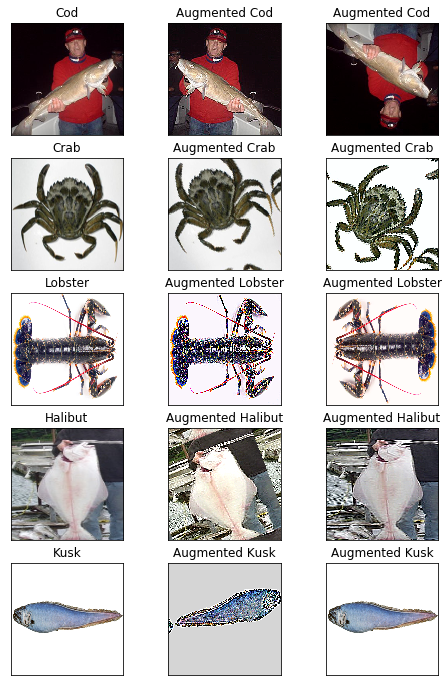

In [168]:
idx= 10
fig, ax = plt.subplots(figsize=(8,12))

plt.subplot(5, 3, 1)
plt.imshow(kfold_data[0][0][0*temp + idx])
plt.xticks([])
plt.yticks([])
plt.title('Cod')


plt.subplot(5, 3, 2)
plt.imshow(kfold_data[0][0][1*temp + idx])
plt.xticks([])
plt.yticks([])
plt.title('Augmented Cod')

plt.subplot(5, 3, 3)
plt.imshow(kfold_data[0][0][2*temp + idx])
plt.xticks([])
plt.yticks([])
plt.title('Augmented Cod')

idx= 17

plt.subplot(5, 3, 4)
plt.imshow(kfold_data[0][0][0*temp + idx])
plt.xticks([])
plt.yticks([])
plt.title('Crab')


plt.subplot(5, 3, 5)
plt.imshow(kfold_data[0][0][1*temp + idx])
plt.xticks([])
plt.yticks([])
plt.title('Augmented Crab')

plt.subplot(5, 3, 6)
plt.imshow(kfold_data[0][0][2*temp + idx])
plt.xticks([])
plt.yticks([])
plt.title('Augmented Crab')

idx= 24

plt.subplot(5, 3, 7)
plt.imshow(kfold_data[0][0][0*temp + idx])
plt.xticks([])
plt.yticks([])
plt.title('Lobster')


plt.subplot(5, 3, 8)
plt.imshow(kfold_data[0][0][1*temp + idx])
plt.xticks([])
plt.yticks([])
plt.title('Augmented Lobster')

plt.subplot(5, 3, 9)
plt.imshow(kfold_data[0][0][2*temp + idx])
plt.xticks([])
plt.yticks([])
plt.title('Augmented Lobster')

idx = 206

plt.subplot(5, 3, 10)
plt.imshow(kfold_data[0][0][0*temp + idx])
plt.xticks([])
plt.yticks([])
plt.title('Halibut')


plt.subplot(5, 3, 11)
plt.imshow(kfold_data[0][0][1*temp + idx])
plt.xticks([])
plt.yticks([])
plt.title('Augmented Halibut')

plt.subplot(5, 3, 12)
plt.imshow(kfold_data[0][0][2*temp + idx])
plt.xticks([])
plt.yticks([])
plt.title('Augmented Halibut')


idx = 215

plt.subplot(5, 3, 13)
plt.imshow(kfold_data[0][0][0*temp + idx])
plt.xticks([])
plt.yticks([])
plt.title('Kusk')


plt.subplot(5, 3, 14)
plt.imshow(kfold_data[0][0][1*temp + idx])
plt.xticks([])
plt.yticks([])
plt.title('Augmented Kusk')

plt.subplot(5, 3, 15)
plt.imshow(kfold_data[0][0][2*temp + idx])
plt.xticks([])
plt.yticks([])
plt.title('Augmented Kusk')


plt.savefig('image_augmentation.jpg')
plt.show()


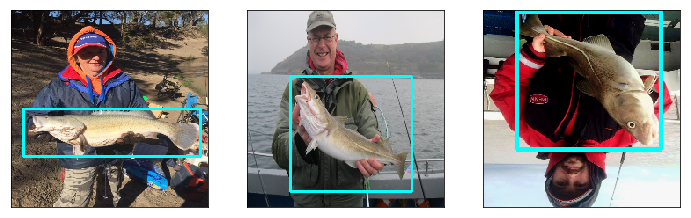

In [319]:
fig, ax = plt.subplots(figsize=(12,15))



plt.subplot(1, 3, 1)
idx = 10
pt1 = (int(all_bboxes[idx][0]),int(all_bboxes[idx][1]))
pt2 = (int(all_bboxes[idx][2]),int(all_bboxes[idx][3]))
img = cv2.rectangle(all_images[idx],pt1,pt2,(0,255,255),thickness=2)
pil_im = Image.fromarray(img)
plt.imshow(pil_im)
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 2)
idx = 602
pt1 = (int(all_bboxes[idx][0]),int(all_bboxes[idx][1]))
pt2 = (int(all_bboxes[idx][2]),int(all_bboxes[idx][3]))
img = cv2.rectangle(all_images[idx],pt1,pt2,(0,255,255),thickness=2)
pil_im = Image.fromarray(img)
plt.imshow(pil_im)
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 3)
idx = 4008
pt1 = (int(all_bboxes[idx][0]),int(all_bboxes[idx][1]))
pt2 = (int(all_bboxes[idx][2]),int(all_bboxes[idx][3]))
img = cv2.rectangle(all_images[idx],pt1,pt2,(0,255,255),thickness=2)
pil_im = Image.fromarray(img)
plt.imshow(pil_im)
plt.xticks([])
plt.yticks([])

plt.savefig('axis_aligned_bounding_boxes.jpg')
plt.show()

In [181]:
pt2

(128, 170)